# CCD Bike Parking Data Exploration

In [1]:
import os
import sys
sys.path.append('/home/simon/files/client/ccd/ccd-data-cleaning/')

%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
from ccd.utils import read_layers_from_gdb
from ccd.parking_zone_evaluator import ParkingZoneEvaluator

set the working directory

In [3]:
os.chdir('/home/simon/files/client/ccd/ccd-data-cleaning/')

In [4]:
pz_gdb = 'data/raw/ParkingZones.gdb'

In [5]:
sample_uuid = '{8EDBF341-6399-4A77-B90E-D4E34425145E}'

In [6]:
layers = read_layers_from_gdb(pz_gdb)

In [7]:
pz = layers['Parking_Zones']
pzr = layers['Parking_Zone_Regulations']
pza = layers['Parking_Zones__ATTACH']

In [79]:
def series_profile(series):
    name = series.name
    is_null = series.isnull().value_counts().to_dict()
    print(name)
    if True not in is_null.keys():
        print('No null values')
    elif False not in is_null.keys():
        print('All values are null')
        return
    else:
        print('{} null values and {} non-null values'.format(is_null[True], is_null[False]))
    
    vc = series.value_counts().to_dict()
    print('{} unique values'.format(len(vc)))
    print('value counts: ')
    print(vc)

In [80]:
series_profile(pzr['Time_Limit'])

Time_Limit
2881 null values and 1633 non-null values
10 unique values
value counts: 
{2.0: 592, 3.0: 458, 0.5: 215, 1.0: 181, 0.3: 130, 12.0: 37, 4.0: 13, 0.2: 4, 0.1: 2, 8.0: 1}


In [82]:
pzr[['Regulation','Time_Limit']]

Regulation  Time_Limit
0                      No Stopping         NaN
1                      No Stopping         NaN
2               Truck Loading Only         1.0
3        Time Limited Auto Parking         2.0
4        Time Limited Auto Parking         3.0
5     Contractor Placard Not Valid         NaN
6     Contractor Placard Not Valid         NaN
7               Truck Loading Only         1.0
8           Passenger Loading Only         0.3
9                 CCD Only Parking         NaN
10    Contractor Placard Not Valid         NaN
11              Truck Loading Only         1.0
12       Time Limited Auto Parking         2.0
13       Time Limited Auto Parking         3.0
14              Truck Loading Only         1.0
15              Handicaped Parking         2.0
16              Handicaped Parking         3.0
17    Contractor Placard Not Valid         NaN
18                     No Stopping         NaN
19                     No Stopping         NaN
20                      No Parking         NaN
21                     No Stopping         NaN
22                     No Stopping         NaN
23       Time Limited Auto Parking         2.0
24       Time Limited Auto Parking         3.0
25       Time Limited Auto Parking         2.0
26       Time Limited Auto Parking         3.0
27              Handicaped Parking         NaN
28                     No Stopping         NaN
29                   Valet Parking         NaN
...                            ...         ...
4484                   No Stopping         NaN
4485                   No Stopping         NaN
4486     Time Limited Auto Parking         3.0
4487                   No Stopping         NaN
4488     Time Limited Auto Parking         3.0
4489                   No Stopping         NaN
4490     Time Limited Auto Parking         3.0
4491            Handicaped Parking         3.0
4492                   No Stopping         NaN
4493     Time Limited Auto Parking         3.0
4494            Handicaped Parking         3.0
4495                   No Stopping         NaN
4496                   No Stopping         NaN
4497                   No Stopping         NaN
4498                  Taxi Parking         NaN
4499                   No Stopping         NaN
4500     Time Limited Auto Parking         3.0
4501                   No Stopping         NaN
4502     Time Limited Auto Parking         3.0
4503            Handicaped Parking         3.0
4504                   No Stopping         NaN
4505                   No Stopping         NaN
4506            Handicaped Parking         3.0
4507     Time Limited Auto Parking         NaN
4508         No Regulations Listed         NaN
4509                   No Stopping         NaN
4510     Time Limited Auto Parking         3.0
4511            Handicaped Parking         3.0
4512     Time Limited Auto Parking         3.0
4513                   No Stopping         NaN

[4514 rows x 2 columns]

In [93]:
id = '{8EDBF341-6399-4A77-B90E-D4E34425145E}'

In [136]:
nines[0]

'{DFA3C5DA-F650-4CDE-99ED-6A947933418B}'

In [89]:
pzr['Regulation'].value_counts()['Contractor Placard Not Valid']

384

In [90]:
series_profile(pzr['Time_From_1'])

Time_From_1
No null values
28 unique values
value counts: 
{9911: 2583, 800: 788, 1600: 427, 600: 151, 102: 128, 700: 124, 1000: 124, 930: 75, 1530: 56, 1800: 12, 2300: 10, 1830: 9, 1700: 4, 1100: 4, 730: 2, 630: 2, 530: 2, 1630: 2, 1730: 2, 500: 1, 400: 1, 1900: 1, 900: 1, 1300: 1, 2000: 1, 30: 1, 9910: 1, 0: 1}


In [91]:
from ccd.utils import byte_to_image

In [153]:
def show_image(id):
    b = pza[pza['REL_GLOBALID'] == id]['DATA']
    l = [byte_to_image(bb) for bb in b]
    if len(l) == 0:
        print('No images associated with this id')
        return None
    if len(l) == 1:
        return l[0].rotate(270)
    print('Multiple ({}) images'.format(len(l)))
    return l

In [155]:
nines = list(pzr[pzr['Time_From_1'] == 9911]['GUID'])

In [184]:
n = nines[4]
n = '{F6558C71-F425-474B-A8F2-471B40437B2A}'

In [185]:
pzr[pzr['GUID'] == n]

GlobalID                    Regulation  \
14  {D6AE4523-1DEE-4506-91E7-DC5F2D2C7F6C}            Truck Loading Only   
15  {BB1C97D2-5FB7-4B16-B575-26002715044A}            Handicaped Parking   
16  {B413C84C-56A1-4620-9833-D3A2E7CD14D6}            Handicaped Parking   
17  {0E44A87C-06EA-433E-AADC-FDB7BCEBAE7A}  Contractor Placard Not Valid   

    Time_From_1  Time_To_1 Day_From_1 Day_To_1  Time_From_2  Time_To_2  \
14          600       1000          1   Friday         9911       9911   
15         1000       1600          1   Friday         9911       9911   
16         1600       2200          1   Friday          700       2200   
17         9911       9911        N/A      N/A         9911       9911   

   Day_From_2 Day_To_2 Notes                                    GUID  \
14        N/A      N/A  None  {F6558C71-F425-474B-A8F2-471B40437B2A}   
15        N/A      N/A  None  {F6558C71-F425-474B-A8F2-471B40437B2A}   
16   Saturday   Sunday  None  {F6558C71-F425-474B-A8F2-471B40437B2A}   
17        N/A      N/A  None  {F6558C71-F425-474B-A8F2-471B40437B2A}   

                  Created_By           Created_On Edited_By  \
14  mdecerbo@CENTERCITYDISTR  2019-01-02T13:07:47      DYAW   
15  mdecerbo@CENTERCITYDISTR  2019-01-02T13:08:45      DYAW   
16  mdecerbo@CENTERCITYDISTR  2019-01-02T13:13:50      DYAW   
17  mdecerbo@CENTERCITYDISTR  2019-01-02T13:14:03      DYAW   

              Edited_On  Time_Limit                        RegCat  
14  2019-02-28T14:27:47         1.0  Truck Parking / Loading Only  
15  2019-02-28T12:04:47         2.0           Handicapped Parking  
16  2019-02-28T12:04:47         3.0           Handicapped Parking  
17  2019-02-28T12:02:56         NaN       Nontemporal Regulations

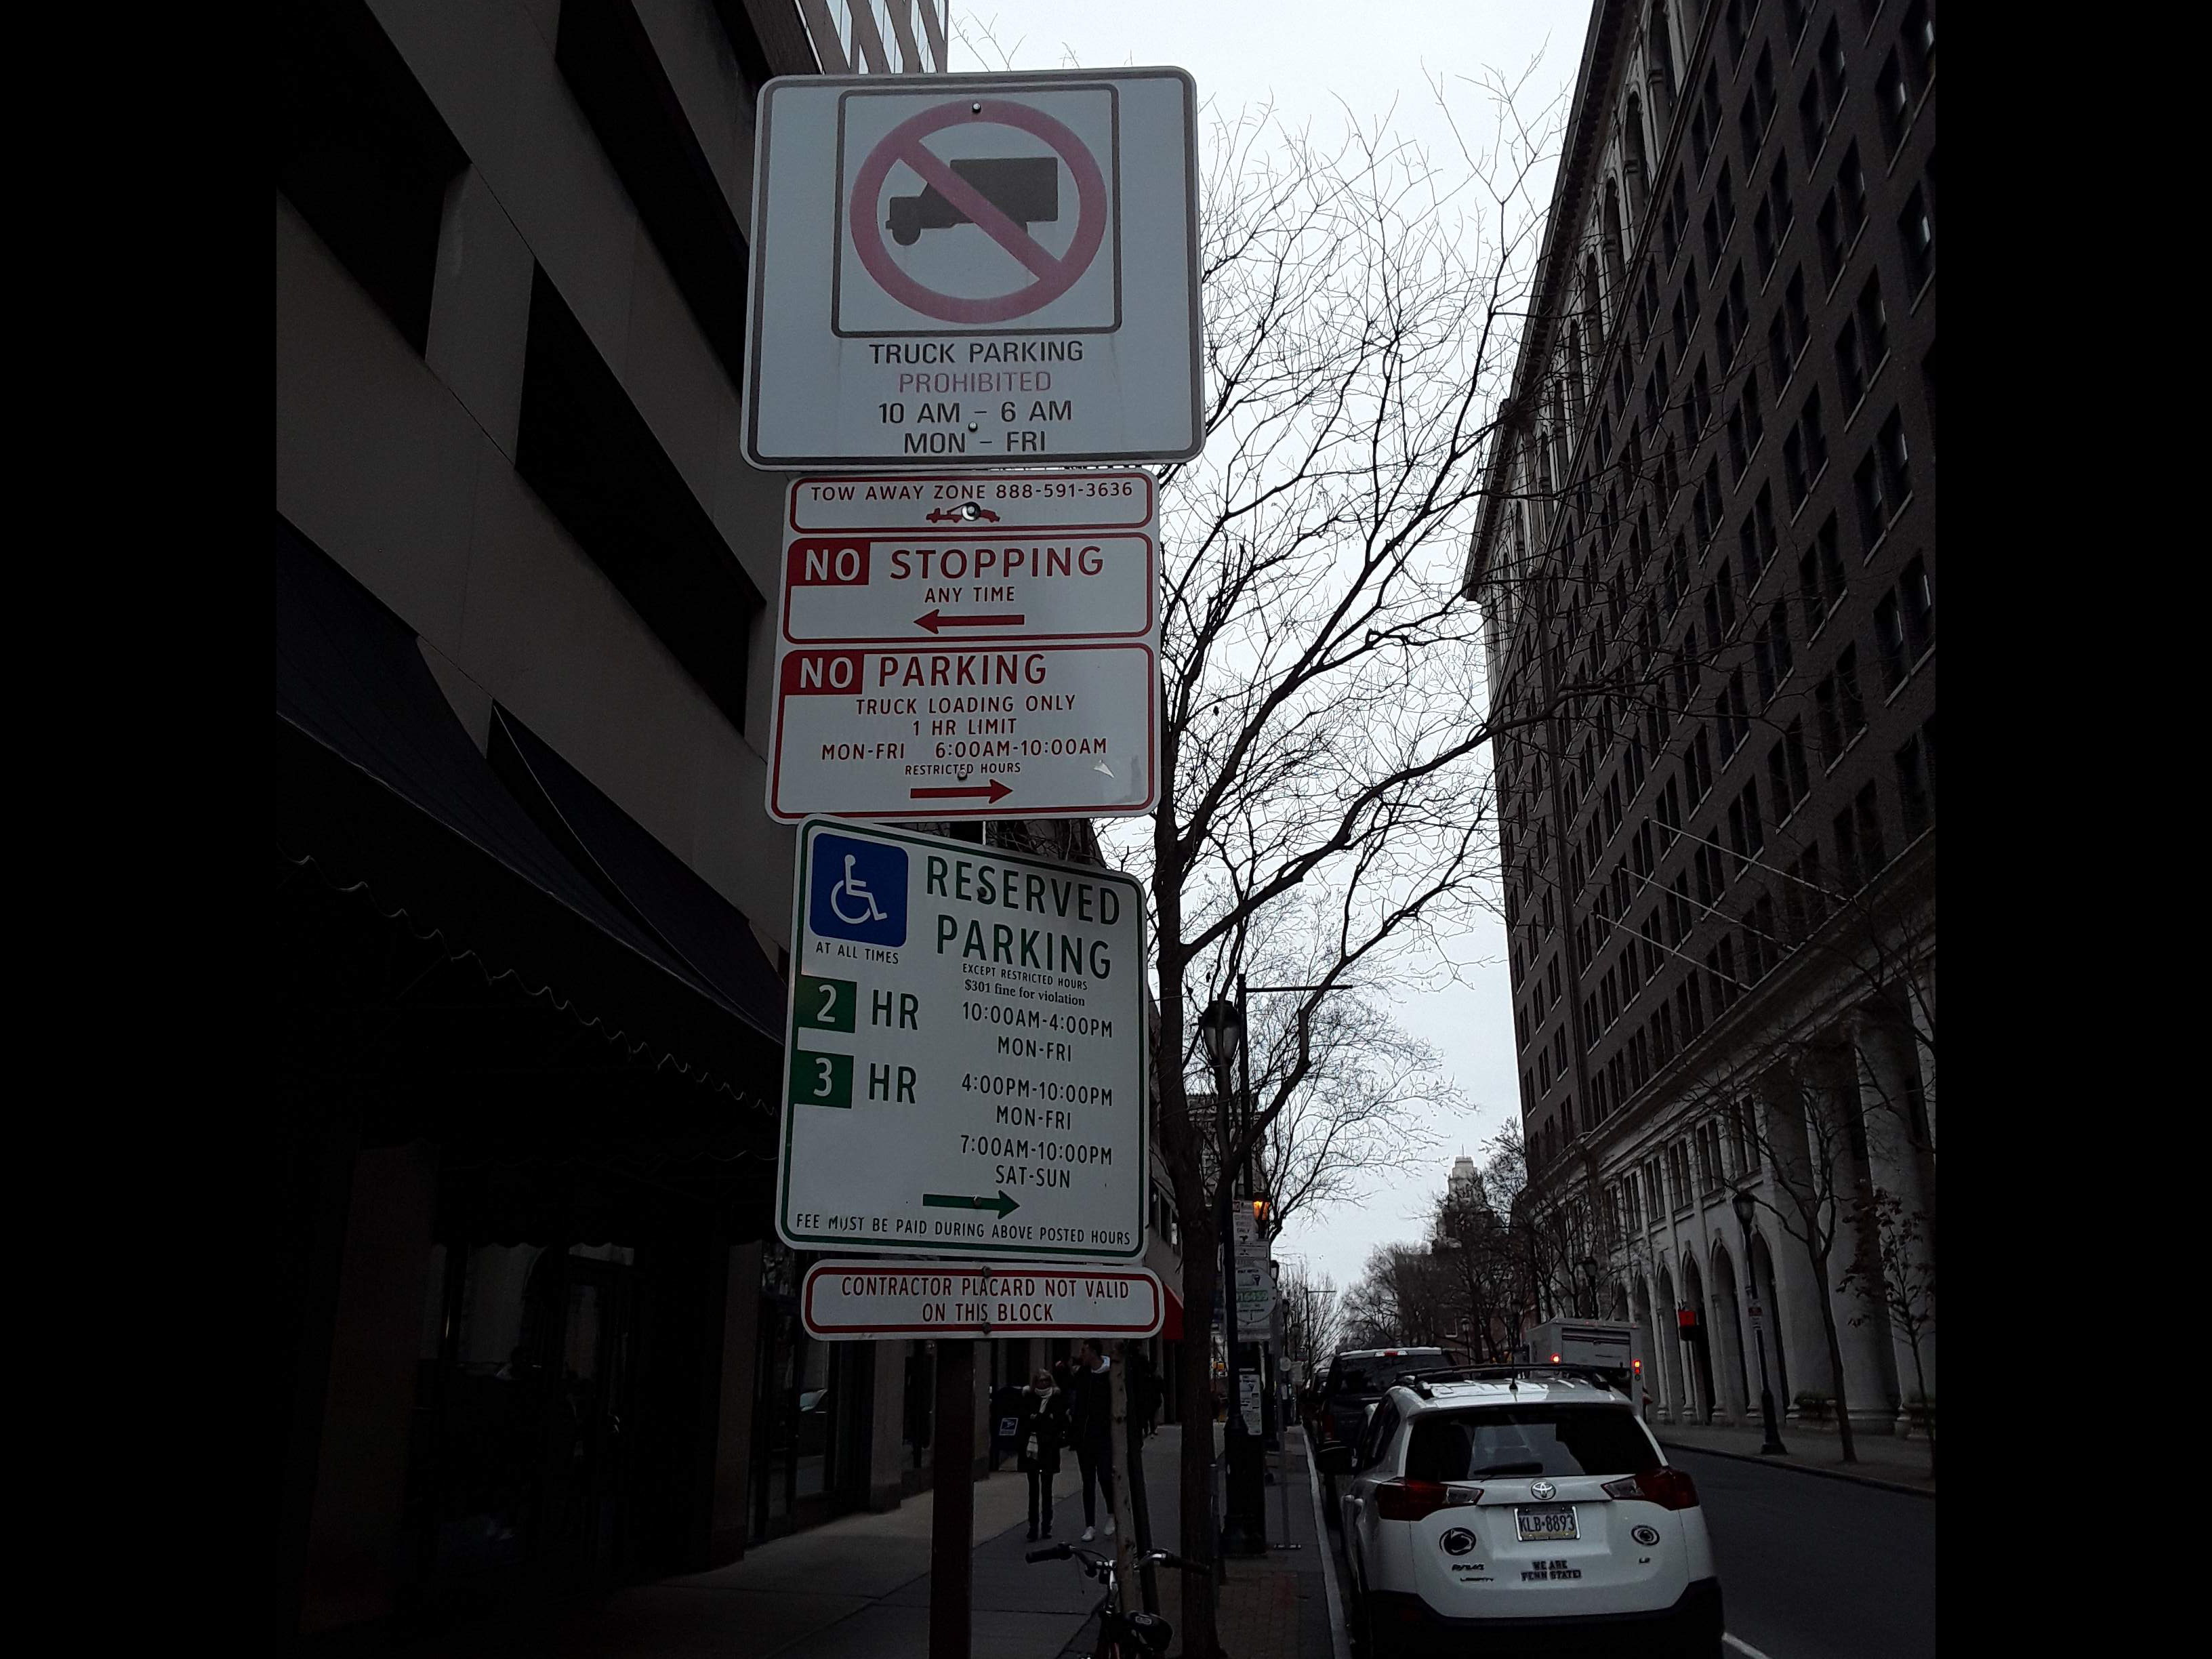

In [186]:
show_image(n)

In [187]:
dtd = {
    'mo': 10,
    'tu': 11,
    'we': 12,
    'th': 13,
    'fr': 14,
    'sa': 15,
    'su': 16
}

In [203]:
s ='fr'
e ='mo'

In [204]:
days = list(dtd.keys())

In [205]:
si = days.index(s)
ei = days.index(e)

In [207]:
si

4

In [208]:
ei

0

['fr', 'sa', 'su', 'mo']